<div style="text-align: center; font-weight: bold; font-size: 32px;">
  ASL alphabet
</div>

#### ***Configuration utilisée pour le projet***

##### Informations système
- **Système d'exploitation** : Windows 10
- **Version de Python** : 3.11.4
- **Nombre de cœurs CPU** : 6
- **Nombre de threads** : 12
- **Fréquence CPU** : 3593.0 MHz
- **Mémoire RAM totale** : 15.91 GB
- **Espace disque total** : 237.5 GB

##### Informations GPU
- **Nom du GPU** : NVIDIA GeForce RTX 3070
- **Mémoire totale du GPU** : 8192.0 MB
- **Mémoire libre du GPU** : 7216.0 MB
- **Mémoire utilisée du GPU** : 803.0 MB
- **Utilisation du GPU** : 0.0 %
- **Température du GPU** : 38.0 °C

données : https://www.kaggle.com/datasets/lexset/synthetic-asl-alphabet

## **1. Installation des librairies**
<h2 style="border-bottom: 3px solid #00afb9;"> 
</h2>

In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip3 install torchsummary
!pip3 install scikit-learn
!pip3 install fastai

!pip3 install opencv-python
!pip3 install pillow

!pip3 install "numpy<2"
!pip3 install pandas

!pip3 install matplotlib
!pip3 install seaborn

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.5.1%2Bcu118-cp312-cp312-win_amd64.whl (2700.1 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.20.1%2Bcu118-cp312-cp312-win_amd64.whl (5.3 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.5.1%2Bcu118-cp312-cp312-win_amd64.whl (4.0 MB)
  Using cached https://download.pytorch.org/whl/filelock-3.13.1-py3-none-any.whl (11 kB)
  Using cached https://download.pytorch.org/whl/typing_extensions-4.9.0-py3-none-any.whl (32 kB)
  Using cached https://download.pytorch.org/whl/networkx-3.2.1-py3-none-any.whl (1.6 MB)
  Using cached https://download.pytorch.org/whl/Jinja2-3.1.3-py3-none-any.whl (133 kB)
  Using cached https://download.pytorch.org/whl/fsspec-2024.2.0-py3-none-any.whl (170 kB)
  Using cached https://download.pytorch.org/whl/setuptools-70.0.0-py3-none-any.whl (863 kB)
  Using cached https://download.pytorch.org/whl/sympy-1

  You can safely remove it manually.
  You can safely remove it manually.


  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


## **2. Importation des librairies**
<h2 style="border-bottom: 3px solid #00afb9;"></h2>

In [9]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image, ImageOps, ExifTags

import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models import AlexNet_Weights, VGG19_Weights
from torch.utils.data import DataLoader, Dataset

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torchsummary import summary

from fastai.vision.all import *

from sklearn.metrics import confusion_matrix

## **3. Chargement et préparation des données**
<h2 style="border-bottom: 3px solid #00afb9;"></h2>

In [10]:
# Définir les transformations (normalisation)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Charger les ensembles de données d'entraînement
train_dataset = datasets.ImageFolder(os.path.join("./Data/Train_Alphabet"), transform=transform)

# Charger les ensembles de données de test
test_set = datasets.ImageFolder(os.path.join("./Data/Test_Alphabet"), transform=transform)

# Séparer les données d'entraînement et de validation
train_set, val_set = torch.utils.data.random_split(train_dataset, [int(0.8*len(train_dataset)), len(train_dataset)-int(0.8*len(train_dataset))])

# Définir les classes
classes = train_dataset.classes
print(f'Nombre de classes : {len(classes)}')
print(f'Les différentes classes : {classes}')

Nombre de classes : 27
Les différentes classes : ['A', 'B', 'Blank', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [11]:
# Définir la taille du batch
batch_size  = 32

# Créer des loaders pour batcher les données
trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False)
testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

print(f'Train set: {len(train_set)} images dans {len(trainloader)} batches')
print(f'Validation set: {len(val_set)} images dans {len(valloader)} batches')
print(f'Test set: {len(test_set)} images dans {len(testloader)} batches')

Train set: 19440 images dans 608 batches
Validation set: 4860 images dans 152 batches
Test set: 2700 images dans 85 batches


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.38770443..1.584706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.26278865..1.279695].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.39530808..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4828431..1.410414].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.40406162..1.4801308].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.37057972..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3077731..1.324

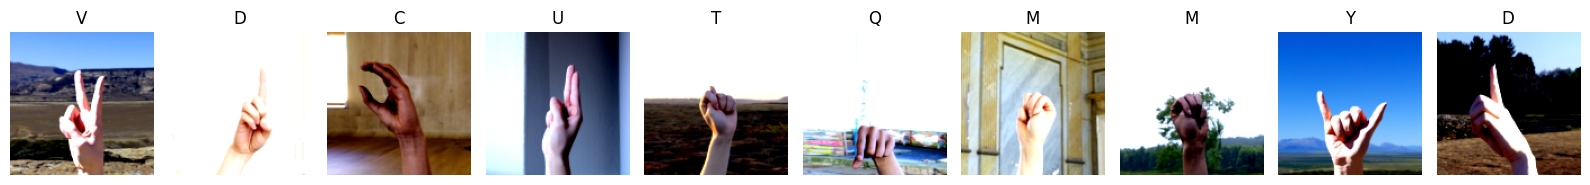

In [12]:
# Obtenir un batch d'images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Fonction pour dénormaliser et afficher les images correctement
def imshow(img, ax):
    img = img / 2 + 0.5  # Dénormalisation (pour revenir à la plage [0, 1])
    npimg = img.numpy()  # Convertir en numpy array
    ax.imshow(np.transpose(npimg, (1, 2, 0)))  # Replacer les canaux pour être au format (H, W, C)
    ax.axis('off')  # Enlever les axes

# Afficher les images avec les labels correspondants
fig, axes = plt.subplots(1, 10, figsize=(16, 6))
for i in range(10):
    ax = axes[i]
    imshow(images[i], ax)  # Afficher l'image après dénormalisation
    ax.set_title(f"{classes[labels[i].item()]}")  # Ajouter le titre avec le label correspondant
plt.tight_layout()  # Ajuster la mise en page pour éviter le chevauchement
plt.show()

## **4. Création du CNN**
<h2 style="border-bottom: 3px solid #00afb9;"></h2>

### **4.1. Modèle maison**

In [13]:
# Avoir le GPU comme device si possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Utilisation du device: {device}')

Utilisation du device: cuda


In [14]:
# Définir du modèle CNN
class SignLanguageCNN(nn.Module):
    def __init__(self):
        super(SignLanguageCNN, self).__init__()
        
        # Première couche de convolution :
        # - in_channels=3 pour les images en couleurs (RGB)
        # - out_channels=32 : 32 filtres de convolution
        # - kernel_size=3 : taille du filtre 3x3
        # - padding=1 pour conserver la taille des images
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),  # Convolution
            nn.BatchNorm2d(32),  # Normalisation
            nn.ReLU(),  # Activation
            nn.MaxPool2d(kernel_size=2, stride=2)  # Pooling (réduction de la taille des images)
        )

        # Deuxième couche de convolution :
        # - in_channels=32 : prend en entrée les 32 cartes de caractéristiques de la couche précédente
        # - out_channels=64 : produit 64 cartes de caractéristiques
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),  # Convolution
            nn.BatchNorm2d(64),  # Normalisation
            nn.ReLU(),  # Activation
            nn.MaxPool2d(2)  # Pooling (réduction de la taille des images)
        )
        
        # Troisième couche de convolution :
        # - in_channels=64 : prend en entrée les 64 cartes de caractéristiques de la couche précédente
        # - out_channels=128 : produit 128 cartes de caractéristiques
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),  # Convolution
            nn.BatchNorm2d(128),  # Normalisation
            nn.ReLU(),  # Activation
            nn.MaxPool2d(2)  # Pooling (réduction de la taille des images)
        )
        
        # Couche linéaire (Fully Connected) :
        # - Après 2 couches de convolution, la taille des images est réduite (128x128 -> 32x32 -> 6x6).
        self.fc1 = nn.Linear(128 * 16 * 16, 512)  # Première couche linéaire (Flatten)
        
        # Dropout pour régularisation
        self.dropout = nn.Dropout(0.25) 
        
        # Couche finale : 29 sorties pour les 29 classes (26 lettres + 'space')
        self.fc2 = nn.Linear(512, len(classes))

    def forward(self, x):
        '''
        Propagation avant du modèle (forward pass).
        Applique les couches de convolution, d'activation, et linéaires.
        '''
        x = self.layer1(x) # Première couche de convolution
        x = self.layer2(x) # Deuxième couche de convolution
        x = self.layer3(x) # Troisième couche de convolution
        x = x.view(x.size(0), -1) # Aplatir les données pour la couche Fully Connected
        x = self.fc1(x) # Première couche linéaire
        x = self.dropout(x) # Dropout pour régularisation
        x = self.fc2(x) # Couche finale
        
        return x

# Instancier le modèle et l'envoyer sur le device (GPU si disponible)
model_maison = SignLanguageCNN().to(device)

# Fonction de coût et optimiseur
model_maison_criterion = nn.CrossEntropyLoss()
model_maison_optimizer = torch.optim.Adam(model_maison.parameters(), lr=0.001)

# Afficher les paramètres du modèle pour en avoir un aperçu
summary(model_maison, input_size=(3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
       BatchNorm2d-2         [-1, 32, 128, 128]              64
              ReLU-3         [-1, 32, 128, 128]               0
         MaxPool2d-4           [-1, 32, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          18,496
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
         MaxPool2d-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]          73,856
      BatchNorm2d-10          [-1, 128, 32, 32]             256
             ReLU-11          [-1, 128, 32, 32]               0
        MaxPool2d-12          [-1, 128, 16, 16]               0
           Linear-13                  [-1, 512]      16,777,728
          Dropout-14                  [

### **4.2. Modèle AlexNet**

In [15]:
# Charger le modèle pré-entraîné AlexNet
weights = AlexNet_Weights.DEFAULT
AlexNet_model = torchvision.models.alexnet(weights=weights)

# Geler les paramètres du modèle pré-entraîné
for param in AlexNet_model.parameters():
    param.requires_grad = False

# Modifier la dernière couche pour avoir 27 sorties
AlexNet_model.classifier[6] = nn.Linear(4096, len(classes))

# Envoyer le modèle sur le device
AlexNet_model = AlexNet_model.to(device)

# Fonction de coût et optimiseur
AlexNet_criterion = nn.CrossEntropyLoss()
AlexNet_optimizer = torch.optim.Adam(AlexNet_model.parameters(), lr=0.001)

# Afficher les paramètres du modèle pour en avoir un aperçu
summary(AlexNet_model, input_size=(3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 31, 31]          23,296
              ReLU-2           [-1, 64, 31, 31]               0
         MaxPool2d-3           [-1, 64, 15, 15]               0
            Conv2d-4          [-1, 192, 15, 15]         307,392
              ReLU-5          [-1, 192, 15, 15]               0
         MaxPool2d-6            [-1, 192, 7, 7]               0
            Conv2d-7            [-1, 384, 7, 7]         663,936
              ReLU-8            [-1, 384, 7, 7]               0
            Conv2d-9            [-1, 256, 7, 7]         884,992
             ReLU-10            [-1, 256, 7, 7]               0
           Conv2d-11            [-1, 256, 7, 7]         590,080
             ReLU-12            [-1, 256, 7, 7]               0
        MaxPool2d-13            [-1, 256, 3, 3]               0
AdaptiveAvgPool2d-14            [-1, 25

### **4.3. Modèle VGG19**

In [16]:
# Charger le modèle pré-entraîné VGG19
weights = VGG19_Weights.DEFAULT
VGG19_model = models.vgg19(weights=weights)

# Geler les paramètres du modèle pré-entraîné
for param in VGG19_model.parameters():
    param.requires_grad = False
    
# Modifier la dernière couche pour avoir 27 sorties 
VGG19_model.classifier[6] = nn.Linear(4096, len(classes))

# Envoyer le modèle sur le device
VGG19_model = VGG19_model.to(device)

# Fonction de coût et optimiseur
VGG19_criterion = nn.CrossEntropyLoss()
VGG19_optimizer = torch.optim.Adam(VGG19_model.parameters(), lr=0.001)

# Afficher les paramètres du modèle pour en avoir un aperçu
summary(VGG19_model, input_size=(3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           1,792
              ReLU-2         [-1, 64, 128, 128]               0
            Conv2d-3         [-1, 64, 128, 128]          36,928
              ReLU-4         [-1, 64, 128, 128]               0
         MaxPool2d-5           [-1, 64, 64, 64]               0
            Conv2d-6          [-1, 128, 64, 64]          73,856
              ReLU-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
              ReLU-9          [-1, 128, 64, 64]               0
        MaxPool2d-10          [-1, 128, 32, 32]               0
           Conv2d-11          [-1, 256, 32, 32]         295,168
             ReLU-12          [-1, 256, 32, 32]               0
           Conv2d-13          [-1, 256, 32, 32]         590,080
             ReLU-14          [-1, 256,

## **5. Entraînement du modèle**
<h2 style="border-bottom: 3px solid #00afb9;"></h2>

In [19]:
epochs = 20

### **5.1. Fonction d'entrainement et de validation du modèle**

In [20]:
# Fonction pour entrainer et valider le modèle avec early stopping
def train_model(model, criterion, optimizer, trainloader, valloader, num_epochs=10, early_stopping=3, save_path=None):
    '''
    Fonction pour entraîner et valider un modèle.
    Prend en entrée le modèle, la fonction de coût, l'optimiseur, le nombre d'époques, et le early stopping.
    Retourne les statistiques d'entraînement et de validation.
    
    Args:
        model : modèle à entraîner
        criterion : fonction de coût
        optimizer : optimiseur
        trainloader : DataLoader pour l'entraînement
        valloader : DataLoader pour la validation
        num_epochs : nombre d'époques
        early_stopping : nombre d'époques sans amélioration pour arrêter l'entraînement
        save_path : chemin pour sauvegarder le modèle avec les meilleurs poids
        
    Returns:
        model : modèle avec les meilleurs poids
        stats : statistiques d'entraînement et de validation
    '''
    
    # Initialiser les variables pour early stopping
    best_val_loss = np.inf
    epochs_no_improve = 0
    
    # Initialiser les statistiques
    stats = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }
    
    # Boucle sur le nombre d'époques
    for epoch in range(num_epochs):
        
        # Initialiser les variables pour les statistiques
        train_loss = 0.0
        train_total = 0
        train_correct = 0
        
        # Mettre le modèle en mode entraînement
        model.train()
        
        # Boucle sur les données d'entraînement
        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device) # Envoyer les données sur le device
            optimizer.zero_grad() # Remettre les gradients à zéro
            outputs = model(inputs) # Propagation avant
            loss = criterion(outputs, labels) # Calculer la perte
            loss.backward() # Rétropropagation
            optimizer.step() # Optimisation
            
            # Calculer les statistiques
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        
        # Mettre le modèle en mode évaluation
        model.eval()
        
        # Initialiser les variables pour les statistiques de validation
        val_loss = 0.0
        val_total = 0
        val_correct = 0
        
        # Désactiver le calcul des gradients
        with torch.no_grad():
            # Boucle sur les données de validation
            for i, (inputs, labels) in enumerate(valloader):
                inputs, labels = inputs.to(device), labels.to(device) # Envoyer les données sur le device
                outputs = model(inputs) # Propagation avant
                loss = criterion(outputs, labels) # Calculer la perte
                
                # Calculer les statistiques
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        # Calculer les statistiques d'entraînement et de validation
        train_loss /= len(trainloader)
        train_acc = train_correct / train_total
        val_loss /= len(valloader)
        val_acc = val_correct / val_total
        
        # Afficher les statistiques
        print (f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
        
        # Sauvegarder les statistiques
        stats['train_loss'].append(train_loss)
        stats['val_loss'].append(val_loss)
        stats['train_acc'].append(train_acc)
        stats['val_acc'].append(val_acc)
        
        # Early stopping et sauvegarde du meilleur modèle
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), save_path)  # Sauvegarder le meilleur modèle
        else:
            epochs_no_improve += 1
            if epochs_no_improve == early_stopping:
                print(f'Early stopping déclenché après {epoch+1} époques')
                break

### **5.2. Modèle maison**

In [21]:
# Entraînement du modèle maison
train_model(
    model_maison, 
    model_maison_criterion, 
    model_maison_optimizer, 
    trainloader, 
    valloader, 
    num_epochs=epochs, 
    early_stopping=3, 
    save_path='./model/image_couleur/model_maison_32.pth'
)

Epoch 1/20, Train Loss: 5.7478, Train Acc: 0.4040, Val Loss: 0.6109, Val Acc: 0.8152
Epoch 2/20, Train Loss: 0.4333, Train Acc: 0.8708, Val Loss: 0.2208, Val Acc: 0.9317
Epoch 3/20, Train Loss: 0.1768, Train Acc: 0.9459, Val Loss: 0.2071, Val Acc: 0.9438
Epoch 4/20, Train Loss: 0.1235, Train Acc: 0.9615, Val Loss: 0.1725, Val Acc: 0.9560
Epoch 5/20, Train Loss: 0.0715, Train Acc: 0.9785, Val Loss: 0.1815, Val Acc: 0.9535
Epoch 6/20, Train Loss: 0.0657, Train Acc: 0.9801, Val Loss: 0.1705, Val Acc: 0.9665
Epoch 7/20, Train Loss: 0.0623, Train Acc: 0.9810, Val Loss: 0.0914, Val Acc: 0.9790
Epoch 8/20, Train Loss: 0.0443, Train Acc: 0.9868, Val Loss: 0.1200, Val Acc: 0.9722
Epoch 9/20, Train Loss: 0.0415, Train Acc: 0.9874, Val Loss: 0.1347, Val Acc: 0.9665
Epoch 10/20, Train Loss: 0.0387, Train Acc: 0.9883, Val Loss: 0.1510, Val Acc: 0.9656
Early stopping déclenché après 10 époques


28min et 57s

### **5.3. Modèle AlexNet**

In [22]:
# Entraînement du modèle AlexNet
train_model(
    AlexNet_model, 
    AlexNet_criterion, 
    AlexNet_optimizer, 
    trainloader, 
    valloader, 
    num_epochs=epochs, 
    early_stopping=3, 
    save_path='./model/image_couleur/AlexNet_model_32.pth'
)

Epoch 1/20, Train Loss: 2.0538, Train Acc: 0.4518, Val Loss: 1.5205, Val Acc: 0.5708
Epoch 2/20, Train Loss: 1.4627, Train Acc: 0.5920, Val Loss: 1.4777, Val Acc: 0.5934
Epoch 3/20, Train Loss: 1.3638, Train Acc: 0.6176, Val Loss: 1.6840, Val Acc: 0.5831
Epoch 4/20, Train Loss: 1.2440, Train Acc: 0.6528, Val Loss: 1.5852, Val Acc: 0.6084
Epoch 5/20, Train Loss: 1.2256, Train Acc: 0.6665, Val Loss: 1.6827, Val Acc: 0.6014
Early stopping déclenché après 5 époques


28min et 27s

### **5.4. Modèle VGG19**

In [23]:
# Entraînement du modèle VGG19
train_model(
    VGG19_model, 
    VGG19_criterion, 
    VGG19_optimizer, 
    trainloader, 
    valloader, 
    num_epochs=epochs, 
    early_stopping=3, 
    save_path='./model/image_couleur/VGG19_model_32.pth'
)

Epoch 1/20, Train Loss: 2.0881, Train Acc: 0.4037, Val Loss: 1.4747, Val Acc: 0.5549
Epoch 2/20, Train Loss: 1.7924, Train Acc: 0.4878, Val Loss: 1.4213, Val Acc: 0.5739
Epoch 3/20, Train Loss: 1.7437, Train Acc: 0.5079, Val Loss: 1.4370, Val Acc: 0.5691
Epoch 4/20, Train Loss: 1.7502, Train Acc: 0.5180, Val Loss: 1.3172, Val Acc: 0.6103
Epoch 5/20, Train Loss: 1.7108, Train Acc: 0.5362, Val Loss: 1.3791, Val Acc: 0.5907
Epoch 6/20, Train Loss: 1.7185, Train Acc: 0.5364, Val Loss: 1.3179, Val Acc: 0.6115
Epoch 7/20, Train Loss: 1.7225, Train Acc: 0.5386, Val Loss: 1.3320, Val Acc: 0.6088
Early stopping déclenché après 7 époques


41min et 48s

## **6. Evaluation du modèle**
<h2 style="border-bottom: 3px solid #00afb9;"></h2>

### **6.1. Fonction de évaluation du modèle**

In [24]:
# Fonction pour tester le modèle
def test_model(model, testloader, criterion):
    '''
    Fonction pour tester un modèle.
    Prend en entrée le modèle et le DataLoader de test.
    Retourne les statistiques de test.
    
    Args:
        model : modèle à tester
        testloader : DataLoader pour le test
        
    Returns:
        stats : statistiques de test
    '''
    
    # Mettre le modèle en mode évaluation
    model.eval()
    
    # Initialiser les variables pour les statistiques
    test_loss = 0.0
    test_total = 0
    test_correct = 0
    
    # Initialiser les listes pour les prédictions et les étiquettes
    all_preds = []
    all_labels = []
    
    # Désactiver le calcul des gradients
    with torch.no_grad():
        # Boucle sur les données de test
        for i, (inputs, labels) in enumerate(testloader):
            inputs, labels = inputs.to(device), labels.to(device) # Envoyer les données sur le device
            outputs = model(inputs) # Propagation avant
            loss = criterion(outputs, labels) # Calculer la perte
            
            # Calculer les statistiques
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            
            # Ajouter les prédictions et les étiquettes aux listes
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculer les statistiques de test
    test_loss /= len(testloader)
    test_acc = test_correct / test_total
    
    # Afficher les statistiques
    print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')
    
    # Retourner les statistiques
    return all_preds, all_labels

In [25]:
# Fonction pour prédire et afficher une image unique avec le modèle
def predict_single_image(model, image_path, class_names):
    # Définir les transformations (y compris la rotation de 90° dans le sens des aiguilles d'une montre)
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.Lambda(lambda img: img.rotate(-90, expand=True)),  # Tourner de 90° dans le sens horaire
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    
    # Charger l'image et la convertir en RGB
    image = Image.open(image_path).convert("RGB")
    
    # Appliquer les transformations (redimensionnement, rotation, conversion en tenseur et normalisation)
    image = transform(image)
    
    plt.imshow(image.permute(1, 2, 0).cpu().numpy())
    plt.title("Image après transformations")
    plt.axis('off')
    plt.show()
    
    # Ajouter une dimension pour le batch
    image = image.unsqueeze(0).to(device)  # Envoyer l'image sur le même device que le modèle
    
    # Passer l'image au modèle pour obtenir la prédiction
    model = model.to(device)  # S'assurer que le modèle est sur le même device
    model.eval()  # Mettre le modèle en mode évaluation
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        predicted_label = class_names[predicted.item()]
    
    # Afficher l'image d'origine avec le label prédit
    original_image = Image.open(image_path)
    rotated_image = original_image.rotate(-90, expand=True)
    plt.imshow(rotated_image)
    plt.title(f'Label prédit : {predicted_label}')
    plt.axis('off')
    plt.show()
    
    return predicted_label

### **6.2. Modèle maison**

In [26]:
# Prédire les labels sur toutes les données de test
all_labels, all_predictions = test_model(model_maison, testloader, model_maison_criterion)

Test Loss: 0.1402, Test Acc: 0.9674


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.55038965..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.49901533..1.2220224].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.32528007..1.3058388].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1589635..1.2535512].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.42156863..1.6195644].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.132703..1.6892812].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.32528007

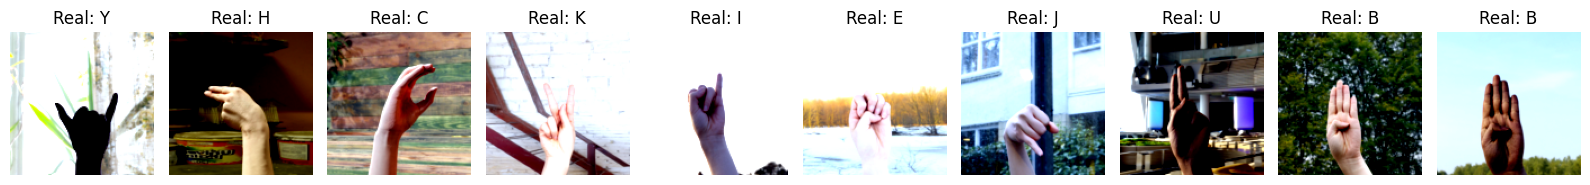

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.55038965..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.49901533..1.2220224].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.32528007..1.3058388].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1589635..1.2535512].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.42156863..1.6195644].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.132703..1.6892812].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.32528007

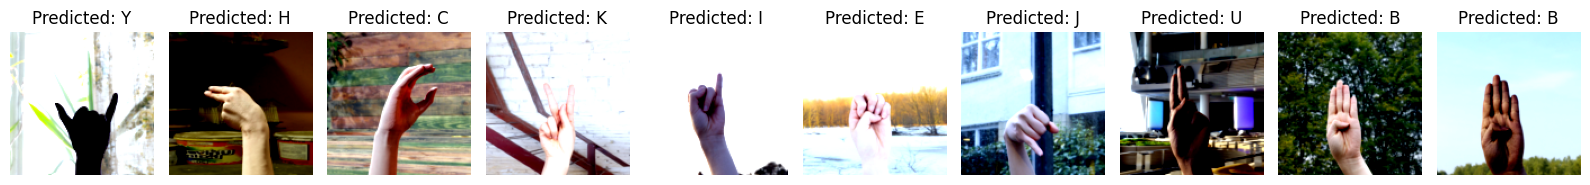

In [27]:
# Comparaison entre image réelle et prédite

# Obtenir un batch d'images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Afficher les images avec les labels correspondants
fig, axes = plt.subplots(1, 10, figsize=(16, 6))
for i in range(10):
    ax = axes[i]
    imshow(images[i], ax)  # Afficher l'image après dénormalisation
    ax.set_title(f"Real: {classes[labels[i].item()]}")  # Ajouter le titre avec le label correspondant
plt.tight_layout()  # Ajuster la mise en page pour éviter le chevauchement
plt.show()

# Prédire les labels
outputs = model_maison(images.to(device)) # Propagation avant
_, predicted = torch.max(outputs, 1) # Prédictions

# Afficher les images avec les labels prédits
fig, axes = plt.subplots(1, 10, figsize=(16, 6))
for i in range(10):
    ax = axes[i]
    imshow(images[i], ax)  # Afficher l'image après dénormalisation
    ax.set_title(f"Predicted: {classes[predicted[i].item()]}")  # Ajouter le titre avec le label prédit
plt.tight_layout()  # Ajuster la mise en page pour éviter le chevauchement
plt.show()

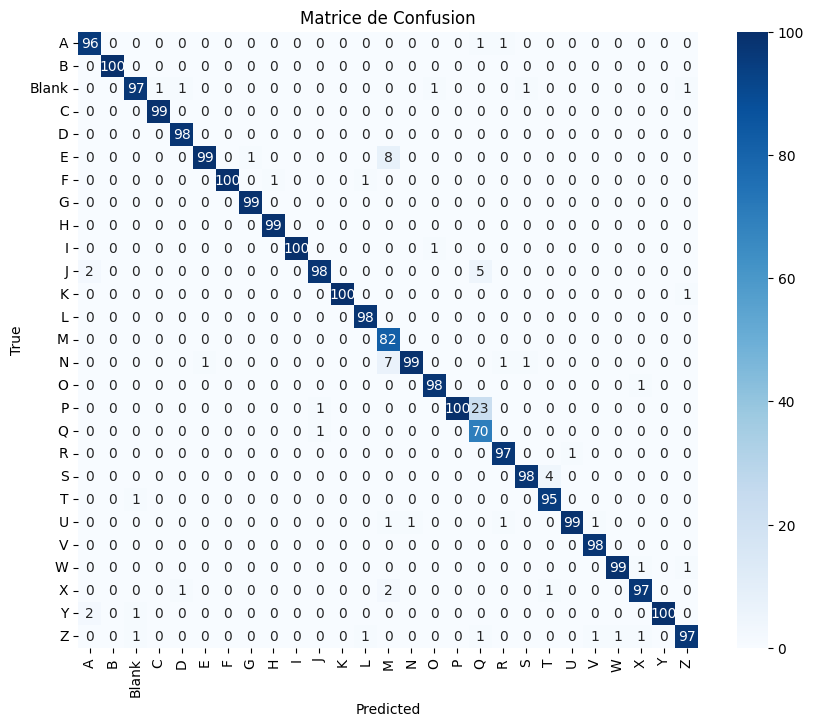

In [28]:
# Calculer la matrice de confusion
cm = confusion_matrix(all_labels, all_predictions)

# Visualiser la matrice de confusion
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice de Confusion')
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\arthu\AppData\Local\Temp\ipykernel_10308\2364227982.py:2: SyntaxWarning: invalid escape sequence '\I'
  image_path = "Data\Image_maison\IMG_0595.jpg"
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5179958].


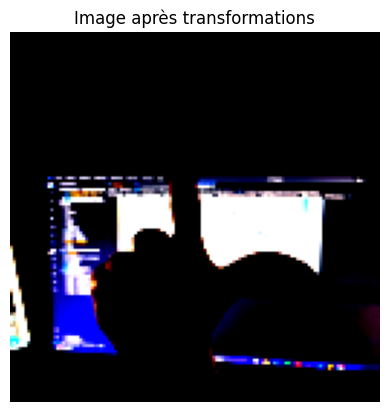

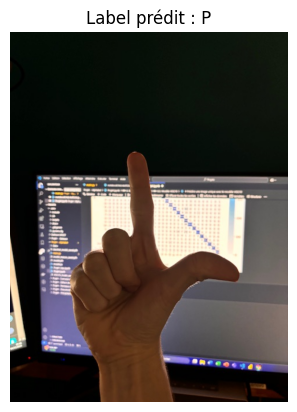

Predicted Class: P


In [29]:
# Prédire une image unique avec le modèle maison
image_path = "Data\Image_maison\IMG_0595.jpg"
predicted_class = predict_single_image(model_maison, image_path, classes)
print(f'Predicted Class: {predicted_class}')

### **6.3. Modèle AlexNet**

In [30]:
# Prédire les labels sur toutes les données de test
all_labels, all_predictions = test_model(AlexNet_model, testloader, AlexNet_criterion)

Test Loss: 1.7555, Test Acc: 0.5837


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4565826..1.2622659].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.39530808..1.5672767].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.37780112..1.3761451].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.49159664..1.3466387].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2640056..1.2274075].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.490453..1.5672767].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5075

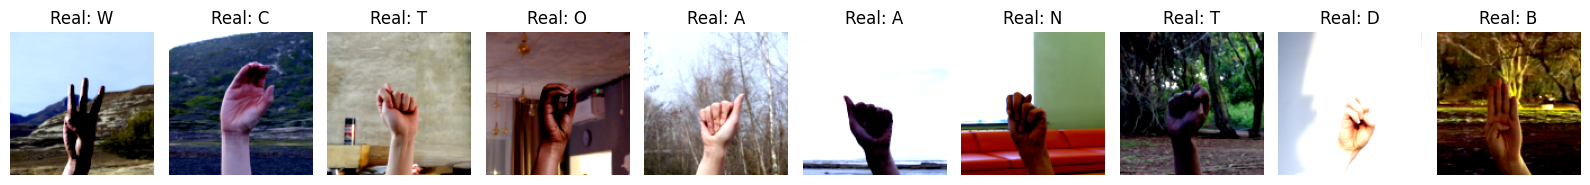

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4565826..1.2622659].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.39530808..1.5672767].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.37780112..1.3761451].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.49159664..1.3466387].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2640056..1.2274075].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.490453..1.5672767].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5075

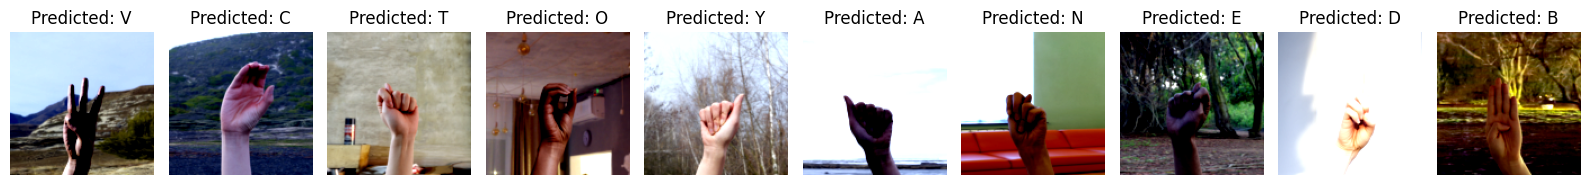

In [31]:
# Comparaison entre image réelle et prédite

# Obtenir un batch d'images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Afficher les images avec les labels correspondants
fig, axes = plt.subplots(1, 10, figsize=(16, 6))
for i in range(10):
    ax = axes[i]
    imshow(images[i], ax)  # Afficher l'image après dénormalisation
    ax.set_title(f"Real: {classes[labels[i].item()]}")  # Ajouter le titre avec le label correspondant
plt.tight_layout()  # Ajuster la mise en page pour éviter le chevauchement
plt.show()

# Prédire les labels
outputs = AlexNet_model(images.to(device)) # Propagation avant
_, predicted = torch.max(outputs, 1) # Prédictions

# Afficher les images avec les labels prédits
fig, axes = plt.subplots(1, 10, figsize=(16, 6))
for i in range(10):
    ax = axes[i]
    imshow(images[i], ax)  # Afficher l'image après dénormalisation
    ax.set_title(f"Predicted: {classes[predicted[i].item()]}")  # Ajouter le titre avec le label prédit
plt.tight_layout()  # Ajuster la mise en page pour éviter le chevauchement
plt.show()

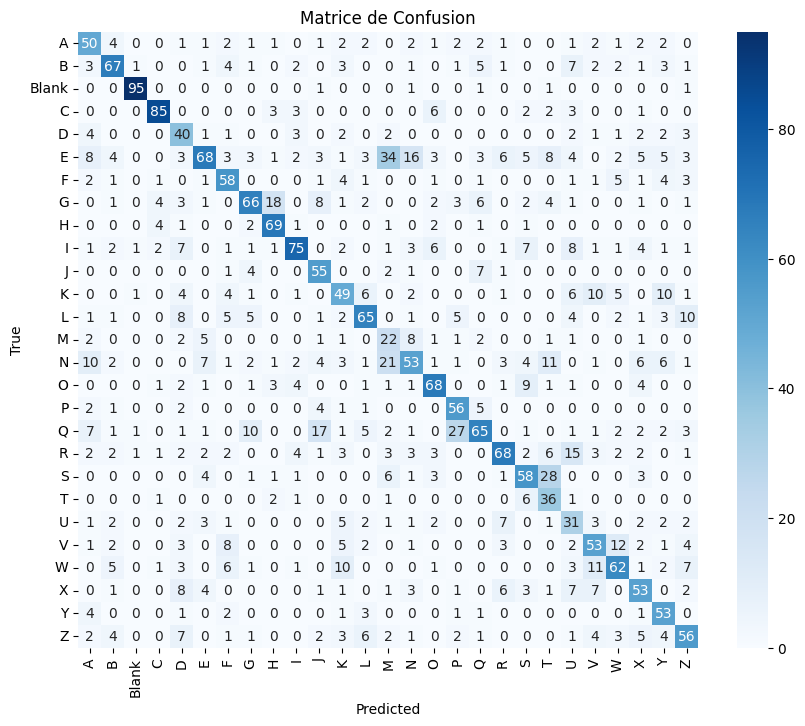

In [32]:
# Calculer la matrice de confusion
cm = confusion_matrix(all_labels, all_predictions)

# Visualiser la matrice de confusion
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice de Confusion')
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\arthu\AppData\Local\Temp\ipykernel_10308\91398779.py:2: SyntaxWarning: invalid escape sequence '\I'
  image_path = "Data\Image_maison\IMG_0595.jpg"
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5179958].


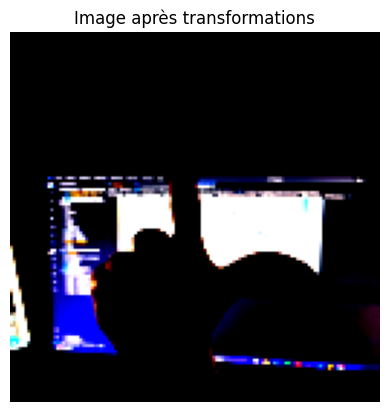

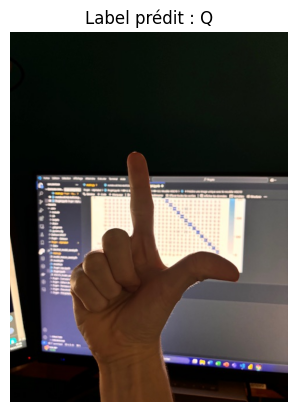

Predicted Class: Q


In [33]:
# Prédire une image unique avec le modèle AlexNet
image_path = "Data\Image_maison\IMG_0595.jpg"
predicted_class = predict_single_image(AlexNet_model, image_path, classes)
print(f'Predicted Class: {predicted_class}')

### **6.4. Modèle VGG19**

In [34]:
# Prédire les labels sur toutes les données de test
all_labels, all_predictions = test_model(VGG19_model, testloader, VGG19_criterion)

Test Loss: 1.3527, Test Acc: 0.6048


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31920546..1.1054032].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.42195398..1.4888453].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4828431..1.6108497].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5161401..1.4341736].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4303221..1.6544228].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.45620346..1.0593373].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.386

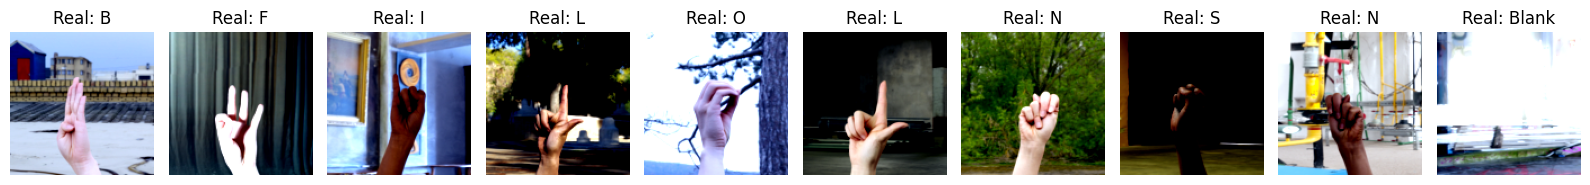

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31920546..1.1054032].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.42195398..1.4888453].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4828431..1.6108497].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5161401..1.4341736].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4303221..1.6544228].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.45620346..1.0593373].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.386

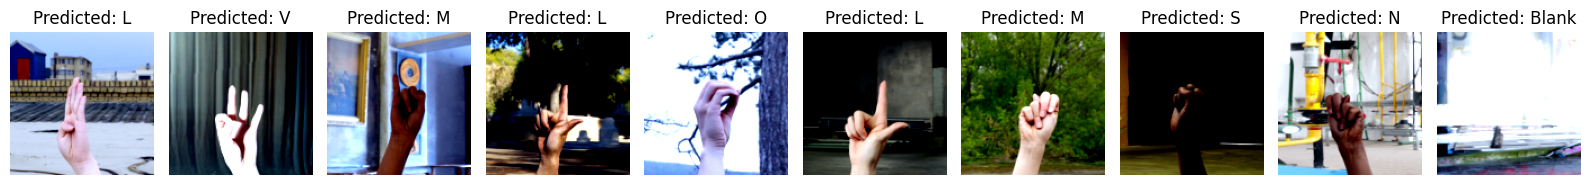

In [35]:
# Comparaison entre image réelle et prédite

# Obtenir un batch d'images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Afficher les images avec les labels correspondants
fig, axes = plt.subplots(1, 10, figsize=(16, 6))
for i in range(10):
    ax = axes[i]
    imshow(images[i], ax)  # Afficher l'image après dénormalisation
    ax.set_title(f"Real: {classes[labels[i].item()]}")  # Ajouter le titre avec le label correspondant
plt.tight_layout()  # Ajuster la mise en page pour éviter le chevauchement
plt.show()

# Prédire les labels
outputs = VGG19_model(images.to(device)) # Propagation avant
_, predicted = torch.max(outputs, 1) # Prédictions

# Afficher les images avec les labels prédits
fig, axes = plt.subplots(1, 10, figsize=(16, 6))
for i in range(10):
    ax = axes[i]
    imshow(images[i], ax)  # Afficher l'image après dénormalisation
    ax.set_title(f"Predicted: {classes[predicted[i].item()]}")  # Ajouter le titre avec le label prédit
plt.tight_layout()  # Ajuster la mise en page pour éviter le chevauchement
plt.show()

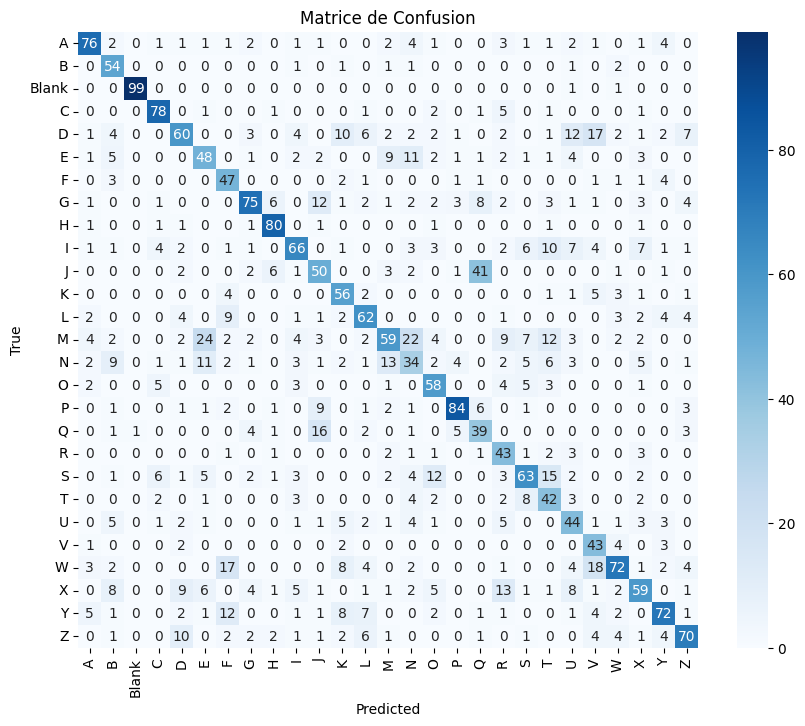

In [36]:
# Calculer la matrice de confusion
cm = confusion_matrix(all_labels, all_predictions)

# Visualiser la matrice de confusion
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice de Confusion')
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\arthu\AppData\Local\Temp\ipykernel_10308\4117155510.py:2: SyntaxWarning: invalid escape sequence '\I'
  image_path = "Data\Image_maison\IMG_0595.jpg"
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5179958].


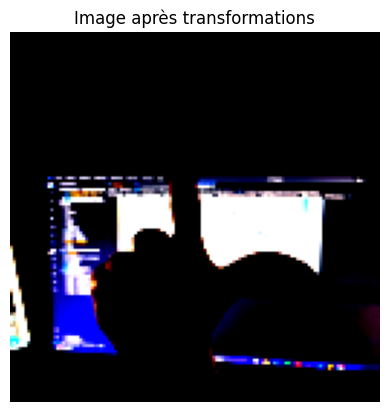

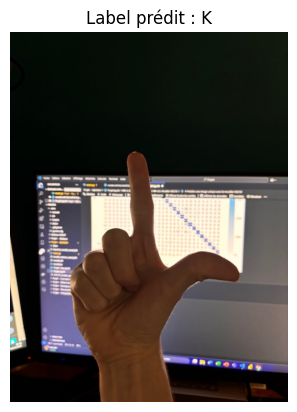

Predicted Class: K


In [37]:
# Prédire une image unique avec le modèle VGG19
image_path = "Data\Image_maison\IMG_0595.jpg"
predicted_class = predict_single_image(VGG19_model, image_path, classes)
print(f'Predicted Class: {predicted_class}')

## **7. Test du modèle avec des données externes**
<h2 style="border-bottom: 3px solid #00afb9;"></h2>

### **6.1. Fonction de test du modèle**

In [ ]:
# Fonction pour prédire et afficher une image unique avec le modèle
def predict_single_image(model, image_path, class_names):
    # Définir les transformations (y compris la rotation de 90° dans le sens des aiguilles d'une montre)
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.Lambda(lambda img: img.rotate(-90, expand=True)),  # Tourner de 90° dans le sens horaire
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    
    # Charger l'image et la convertir en RGB
    image = Image.open(image_path).convert("RGB")
    
    # Appliquer les transformations (redimensionnement, rotation, conversion en tenseur et normalisation)
    image = transform(image)
    
    plt.imshow(image.permute(1, 2, 0).cpu().numpy())
    plt.title("Image après transformations")
    plt.axis('off')
    plt.show()
    
    # Ajouter une dimension pour le batch
    image = image.unsqueeze(0).to(device)  # Envoyer l'image sur le même device que le modèle
    
    # Passer l'image au modèle pour obtenir la prédiction
    model = model.to(device)  # S'assurer que le modèle est sur le même device
    model.eval()  # Mettre le modèle en mode évaluation
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        predicted_label = class_names[predicted.item()]
    
    # Afficher l'image d'origine avec le label prédit
    original_image = Image.open(image_path)
    rotated_image = original_image.rotate(-90, expand=True)
    plt.imshow(rotated_image)
    plt.title(f'Label prédit : {predicted_label}')
    plt.axis('off')
    plt.show()
    
    return predicted_label

### **6.2. Modèle maison**

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\arthu\AppData\Local\Temp\ipykernel_10308\2364227982.py:2: SyntaxWarning: invalid escape sequence '\I'
  image_path = "Data\Image_maison\IMG_0595.jpg"
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5179958].


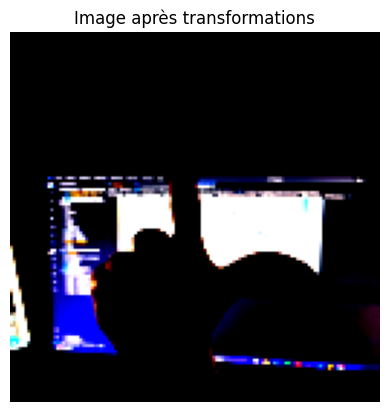

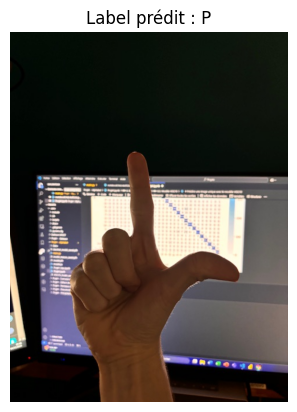

Predicted Class: P


In [39]:
# Prédire une image unique avec le modèle maison
image_path = "Data\Image_maison\IMG_0595.jpg"
predicted_class = predict_single_image(model_maison, image_path, classes)
print(f'Predicted Class: {predicted_class}')

### **6.3. Modèle AlexNet**

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\arthu\AppData\Local\Temp\ipykernel_10308\91398779.py:2: SyntaxWarning: invalid escape sequence '\I'
  image_path = "Data\Image_maison\IMG_0595.jpg"
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5179958].


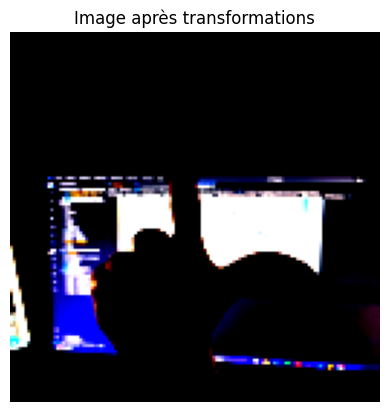

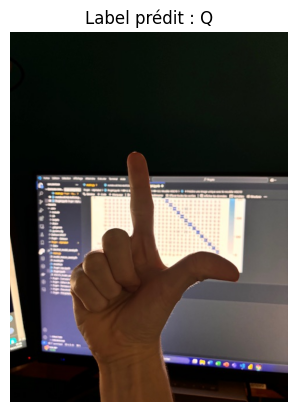

Predicted Class: Q


In [40]:
# Prédire une image unique avec le modèle AlexNet
image_path = "Data\Image_maison\IMG_0595.jpg"
predicted_class = predict_single_image(AlexNet_model, image_path, classes)
print(f'Predicted Class: {predicted_class}')

### **6.4. Modèle VGG19**

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\arthu\AppData\Local\Temp\ipykernel_10308\4117155510.py:2: SyntaxWarning: invalid escape sequence '\I'
  image_path = "Data\Image_maison\IMG_0595.jpg"
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5179958].


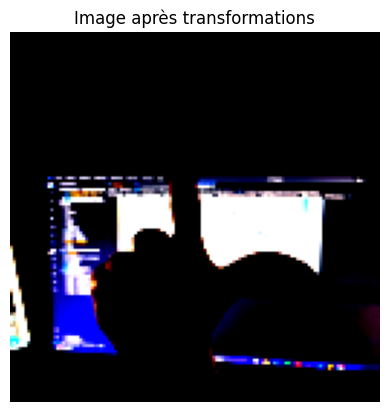

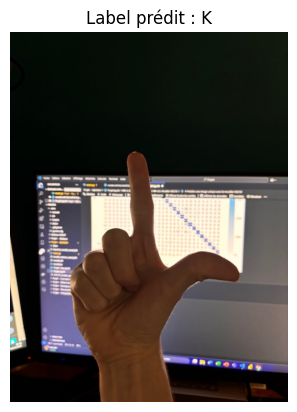

Predicted Class: K


In [41]:
# Prédire une image unique avec le modèle VGG19
image_path = "Data\Image_maison\IMG_0595.jpg"
predicted_class = predict_single_image(VGG19_model, image_path, classes)
print(f'Predicted Class: {predicted_class}')